<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据合并" data-toc-modified-id="数据合并-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据合并</a></span><ul class="toc-item"><li><span><a href="#pd.concat([df1,-df2],-axis=0,-join='outer',-sort=False)" data-toc-modified-id="pd.concat([df1,-df2],-axis=0,-join='outer',-sort=False)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>pd.concat([df1, df2], axis=0, join='outer', sort=False)</a></span></li><li><span><a href="#pd.merge(左表,-右表，how=连接方式，-on=连接字段-)" data-toc-modified-id="pd.merge(左表,-右表，how=连接方式，-on=连接字段-)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>pd.merge(左表, 右表，how=连接方式， on=连接字段 )</a></span></li><li><span><a href="#df1.append(df2)" data-toc-modified-id="df1.append(df2)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>df1.append(df2)</a></span></li></ul></li><li><span><a href="#数据透视pd.pivot_table（df,-values,-index,-columns,-聚合方式）" data-toc-modified-id="数据透视pd.pivot_table（df,-values,-index,-columns,-聚合方式）-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>数据透视pd.pivot_table（df, values, index, columns, 聚合方式）</a></span></li></ul></div>

In [29]:
#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [30]:
import numpy as np
import pandas as pd

# 数据合并

实现数据合并的方法
- pd.concat()
- df.append()
- pd.merge()
- df.join()

## pd.concat([df1, df2], axis=0, join='outer', sort=False)  
**axis=0 默认是纵向拼接 , axis=1横向拼接。**   
**join默认连接方式是外连接, 当然还有inner内连接。注意这里没有左连接和右连接。**  
**sort=False只是消除警告而已**

In [108]:
df = pd.DataFrame({'姓名':['小明', '小张', '小红', '小雅' , '小高',  '小周'], 
                   '性别':['男', '男', '女', '女', '男', np.nan], 
                   '语文':[80, 78, 90, 91, 79, 90], 
                   '数学':[90, 91, 93, 89, 88, 87], 
                   '英语':[78, 89, 78, 90, 67, 80]})
df

,姓名,性别,语文,数学,英语
0,小明,男,80,90,78
1,小张,男,78,91,89
2,小红,女,90,93,78
3,小雅,女,91,89,90
4,小高,男,79,88,67
5,小周,NaN,90,87,80


In [109]:
df1 = df.iloc[0:3, :]
df1

,姓名,性别,语文,数学,英语
0,小明,男,80,90,78
1,小张,男,78,91,89
2,小红,女,90,93,78


In [110]:
df2 = df.iloc[[3, 4], [0, 2, 4]]  # 没有性别和数学这两列
df2

,姓名,语文,英语
3,小雅,91,90
4,小高,79,67


In [118]:
pd.concat([df1, df2], join='outer', sort=False)   #匹配不上的项用空值表示

,姓名,性别,语文,数学,英语
0,小明,男,80,90.0,78
1,小张,男,78,91.0,89
2,小红,女,90,93.0,78
3,小雅,NaN,91,NaN,90
4,小高,NaN,79,NaN,67


In [119]:
pd.concat([df1, df2], axis=1)  # axis=1纵向拼接， 无法匹配上的项用空值填充

,姓名,性别,语文,数学,英语,姓名,语文,英语
0,小明,男,80.0,90.0,78.0,NaN,NaN,NaN
1,小张,男,78.0,91.0,89.0,NaN,NaN,NaN
2,小红,女,90.0,93.0,78.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,小雅,91.0,90.0
4,NaN,NaN,NaN,NaN,NaN,小高,79.0,67.0


In [121]:
pd.concat([df1, df2],  join='inner', sort=False)  # 两者都有的字段才进行拼接

,姓名,语文,英语
0,小明,80,78
1,小张,78,89
2,小红,90,78
3,小雅,91,90
4,小高,79,67


## pd.merge(左表, 右表，how=连接方式， on=连接字段 )  
**pd.merge()基本参照的是数据库表的连接方式， 也是用的最多的连接方式， 逻辑上与数据库保持一致。**  
**how='inner', 即默认是内连接， 这里还可以选择外连接outter 左连接left  右连接right**

In [136]:
df1 = df.copy()
df1

,姓名,性别,语文,数学,英语
0,小明,男,80,90,78
1,小张,男,78,91,89
2,小红,女,90,93,78
3,小雅,女,91,89,90
4,小高,男,79,88,67
5,小周,NaN,90,87,80


In [142]:
df2 = pd.DataFrame({'姓名':['小张', '小高', '小红', '小新'], 
                    '民族':['汉族', '汉族', '回族', '维吾尔族'], 
                    '政治身份':['中共党员', '共青团员', np.nan, '群众']})
df2

,姓名,民族,政治身份
0,小张,汉族,中共党员
1,小高,汉族,共青团员
2,小红,回族,NaN
3,小新,维吾尔族,群众


In [143]:
pd.merge(df1, df2, how='inner', on ='姓名')  # 内连接， 在连接字段上都有的才会连接

,姓名,性别,语文,数学,英语,民族,政治身份
0,小张,男,78,91,89,汉族,中共党员
1,小红,女,90,93,78,回族,NaN
2,小高,男,79,88,67,汉族,共青团员


In [146]:
pd.merge(df1, df2, how='outer', on ='姓名')  # 外连接， 保留所有数据

,姓名,性别,语文,数学,英语,民族,政治身份
0,小明,男,80.0,90.0,78.0,NaN,NaN
1,小张,男,78.0,91.0,89.0,汉族,中共党员
2,小红,女,90.0,93.0,78.0,回族,NaN
3,小雅,女,91.0,89.0,90.0,NaN,NaN
4,小高,男,79.0,88.0,67.0,汉族,共青团员
5,小周,NaN,90.0,87.0,80.0,NaN,NaN
6,小新,NaN,NaN,NaN,NaN,维吾尔族,群众


In [147]:
pd.merge(df1, df2, how='left', on ='姓名')  # 左连接， 保留所有数据, 保留左表的所有数据

,姓名,性别,语文,数学,英语,民族,政治身份
0,小明,男,80,90,78,NaN,NaN
1,小张,男,78,91,89,汉族,中共党员
2,小红,女,90,93,78,回族,NaN
3,小雅,女,91,89,90,NaN,NaN
4,小高,男,79,88,67,汉族,共青团员
5,小周,NaN,90,87,80,NaN,NaN


In [150]:
pd.merge(df1, df2, how='right', on ='姓名')  # 右连接， 保留所有数据, 保留右表的所有数据

,姓名,性别,语文,数学,英语,民族,政治身份
0,小张,男,78.0,91.0,89.0,汉族,中共党员
1,小红,女,90.0,93.0,78.0,回族,NaN
2,小高,男,79.0,88.0,67.0,汉族,共青团员
3,小新,NaN,NaN,NaN,NaN,维吾尔族,群众


## df1.append(df2)  
在df1表末尾追加df2

In [167]:
df1

,姓名,性别,语文,数学,英语
0,小明,男,80,90,78
1,小张,男,78,91,89
2,小红,女,90,93,78
3,小雅,女,91,89,90
4,小高,男,79,88,67
5,小周,NaN,90,87,80


In [168]:
df2

,姓名,民族,政治身份
0,小张,汉族,中共党员
1,小高,汉族,共青团员
2,小红,回族,NaN
3,小新,维吾尔族,群众


In [169]:
df1.append(df2, sort=False)  # sort=False只是消除警告

,姓名,性别,语文,数学,英语,民族,政治身份
0,小明,男,80.0,90.0,78.0,NaN,NaN
1,小张,男,78.0,91.0,89.0,NaN,NaN
2,小红,女,90.0,93.0,78.0,NaN,NaN
3,小雅,女,91.0,89.0,90.0,NaN,NaN
4,小高,男,79.0,88.0,67.0,NaN,NaN
5,小周,NaN,90.0,87.0,80.0,NaN,NaN
0,小张,NaN,NaN,NaN,NaN,汉族,中共党员
1,小高,NaN,NaN,NaN,NaN,汉族,共青团员
2,小红,NaN,NaN,NaN,NaN,回族,NaN
3,小新,NaN,NaN,NaN,NaN,维吾尔族,群众


In [170]:
df1.append(df2, sort=False, ignore_index=True)

,姓名,性别,语文,数学,英语,民族,政治身份
0,小明,男,80.0,90.0,78.0,NaN,NaN
1,小张,男,78.0,91.0,89.0,NaN,NaN
2,小红,女,90.0,93.0,78.0,NaN,NaN
3,小雅,女,91.0,89.0,90.0,NaN,NaN
4,小高,男,79.0,88.0,67.0,NaN,NaN
5,小周,NaN,90.0,87.0,80.0,NaN,NaN
6,小张,NaN,NaN,NaN,NaN,汉族,中共党员
7,小高,NaN,NaN,NaN,NaN,汉族,共青团员
8,小红,NaN,NaN,NaN,NaN,回族,NaN
9,小新,NaN,NaN,NaN,NaN,维吾尔族,群众


**当然pandas中还有join 等连接表的方法， 但很少用， pd.merge()就能解决基本所有问题，这里不再一一叙述。**

# 数据透视pd.pivot_table（df, values, index, columns, 聚合方式）

类似Excel里面的数据透视表

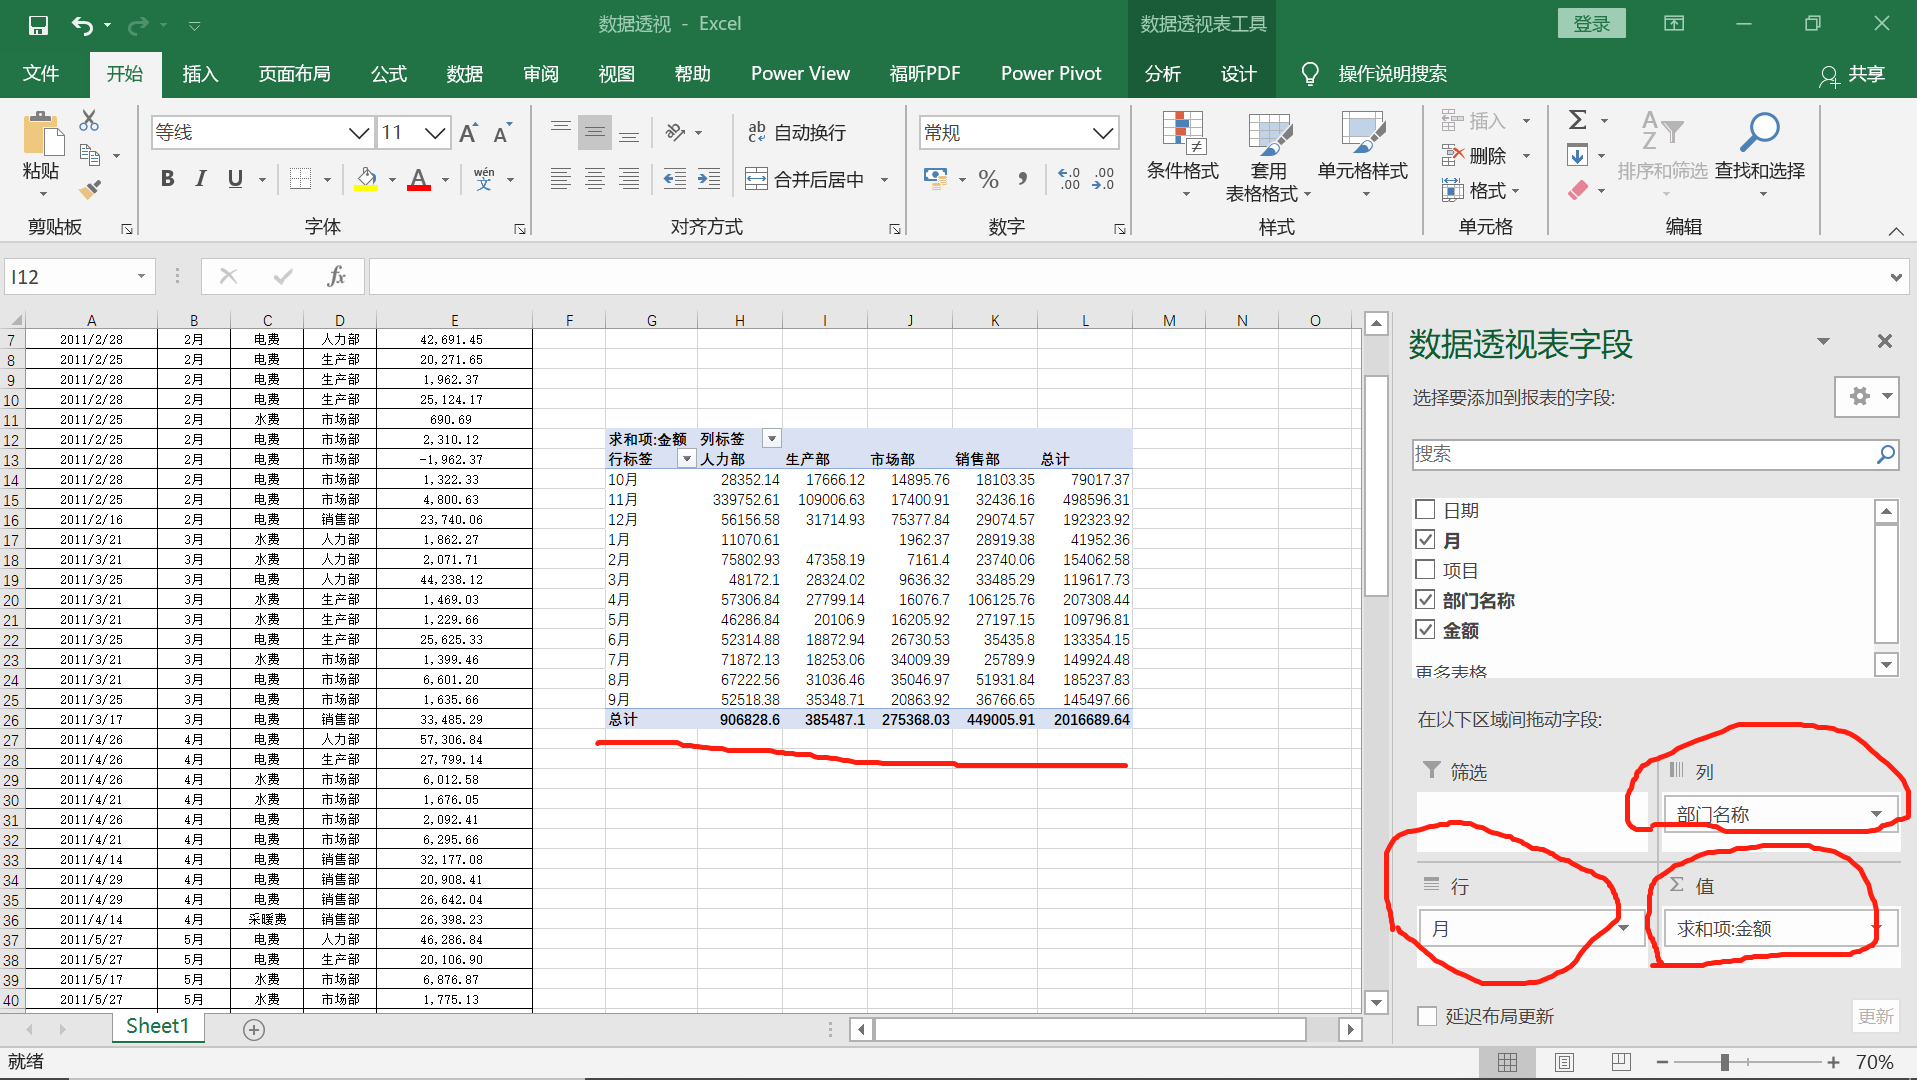

In [188]:
df = pd.read_excel(r'D:\CDA课件\Python数据清洗\mysql_data\数据透视.xlsx')
df.head(10)

,日期,月,项目,部门名称,金额
0,2011-01-20,1月,水费,人力部,3053.74
1,2011-01-27,1月,水费,人力部,8016.87
2,2011-01-27,1月,水费,市场部,1962.37
3,2011-01-14,1月,电费,销售部,28919.38
4,2011-02-25,2月,电费,人力部,33111.48
5,2011-02-28,2月,电费,人力部,42691.45
6,2011-02-25,2月,电费,生产部,20271.65
7,2011-02-28,2月,电费,生产部,1962.37
8,2011-02-28,2月,电费,生产部,25124.17
9,2011-02-25,2月,水费,市场部,690.69


In [189]:
df.shape

(99, 5)

In [190]:
pd.pivot_table(df, values='金额', index='月', columns='部门名称', aggfunc='sum')

部门名称,人力部,市场部,生产部,销售部
月,,,,
10月,28352.14,14895.76,17666.12,18103.35
11月,339752.61,17400.91,109006.63,32436.16
12月,56156.58,75377.84,31714.93,29074.57
1月,11070.61,1962.37,NaN,28919.38
2月,75802.93,7161.40,47358.19,23740.06
3月,48172.10,9636.32,28324.02,33485.29
4月,57306.84,16076.70,27799.14,106125.76
5月,46286.84,16205.92,20106.90,27197.15
6月,52314.88,26730.53,18872.94,35435.80


**当然也可以通过分组聚合的方式得到**

In [194]:
a = df.groupby(['部门名称', '月'])['金额'].agg(np.sum)
a

部门名称  月  
人力部   10月     28352.14
      11月    339752.61
      12月     56156.58
      1月      11070.61
      2月      75802.93
      3月      48172.10
      4月      57306.84
      5月      46286.84
      6月      52314.88
      7月      71872.13
      8月      67222.56
      9月      52518.38
市场部   10月     14895.76
      11月     17400.91
      12月     75377.84
      1月       1962.37
      2月       7161.40
      3月       9636.32
      4月      16076.70
      5月      16205.92
      6月      26730.53
      7月      34009.39
      8月      35046.97
      9月      20863.92
生产部   10月     17666.12
      11月    109006.63
      12月     31714.93
      2月      47358.19
      3月      28324.02
      4月      27799.14
      5月      20106.90
      6月      18872.94
      7月      18253.06
      8月      31036.46
      9月      35348.71
销售部   10月     18103.35
      11月     32436.16
      12月     29074.57
      1月      28919.38
      2月      23740.06
      3月      33485.29
      4月     106125.76
      5月      27197.15
 

In [195]:
type(a)

pandas.core.series.Series

In [200]:
x = pd.DataFrame(a).reset_index()
x

,部门名称,月,金额
0,人力部,10月,28352.14
1,人力部,11月,339752.61
2,人力部,12月,56156.58
3,人力部,1月,11070.61
4,人力部,2月,75802.93
5,人力部,3月,48172.10
6,人力部,4月,57306.84
7,人力部,5月,46286.84
8,人力部,6月,52314.88
9,人力部,7月,71872.13


In [201]:
pd.pivot_table(x, '金额', '部门名称', '月')

月,10月,11月,12月,1月,2月,3月,4月,5月,6月,7月,8月,9月
部门名称,,,,,,,,,,,,
人力部,28352.14,339752.61,56156.58,11070.61,75802.93,48172.10,57306.84,46286.84,52314.88,71872.13,67222.56,52518.38
市场部,14895.76,17400.91,75377.84,1962.37,7161.40,9636.32,16076.70,16205.92,26730.53,34009.39,35046.97,20863.92
生产部,17666.12,109006.63,31714.93,NaN,47358.19,28324.02,27799.14,20106.90,18872.94,18253.06,31036.46,35348.71
销售部,18103.35,32436.16,29074.57,28919.38,23740.06,33485.29,106125.76,27197.15,35435.80,25789.90,51931.84,36766.65


这样也可以